https://www.kaggle.com/bertcarremans/data-preparation-exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# Data at first sight
- 유사한 피쳐들은 같은 태그
- 피쳐 이름 뒤에 bin:binary, cat:category
- -1-> NA
- 타겟 : 보험 계약자에 대해 청구가 제기되었는지의 여부

In [3]:
print(train.shape,'train.shape')
print(test.shape,'test.shape')

(595212, 59) train.shape
(892816, 58) test.shape


In [4]:
#no duplicate rows
train.drop_duplicates(inplace = True)
train.shape

(595212, 59)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

# Metadat
- 데이터에 대한 메타 정보를 저장

다음과 같은 방식으로 저장
- role : input, ID, target
- level : nominal, interval, ordinal, binary
- keep : T or F
- dtype : int, float,str

In [6]:
data = []
for f in train.columns :
    #role 정의
    if f == 'target' :
        role = 'target'
    elif f == 'id' :
        role = 'id'
    else :
        role = 'input'
        
    #level 정의
    if 'bin' in f or f == 'target' :
        level = 'binary'
    elif 'cat' in f or f == 'id' :
        level = 'nominal' #명사형
    elif train[f].dtype == float :
        level = 'interval'
    elif train[f].dtype == int :
        level = 'ordinal'
        
    #id를 제외한 모든 변수를 True로
    keep = True
    if f == 'id' :
        keep = False
    
    #data type
    dtype = train[f].dtype
    
    my_dict = {
        'var_name' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    
    data.append(my_dict)
    
meta = pd.DataFrame(data, columns = ['var_name', 'role', 'level', 'keep', 'dtype'])
meta.set_index('var_name', inplace = True)

In [7]:
meta

,role,level,keep,dtype
var_name,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [8]:
pd.DataFrame({'count' : meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# Descriptive Statistics

## interval 변수

In [9]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


## ordinal 변수

In [10]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


## binary 변수

In [11]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- target value 3.645%로 매우 불균형
- 평균을 살펴보면 대부분의 값들이 0근처라는 값을 알 수 있다

# Handling imbalanced classes
target = 1인 경우가 target = 0보다 훨씬 적다. 다음 전략을 사용할 수 있다.
- target = 1인 경우를 oversampling
- target = 0인 경우를 undersampling(채택)

In [12]:
desired_apriori = 0.1

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

print('---Before undersampling---')
print('target = 0 : ', nb_0)
print('target = 1 : ', nb_1)

print('---After undersampling---')

undersampling_rate = ((1-desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)

print('Rate to undersample records with target = 0 : {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling : {}'.format(undersampled_nb_0))

#target 0 인 레코드에서 무작위로 undersampled index를 구한다.
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)
train = train.loc[idx_list].reset_index(drop = True)

---Before undersampling---
target = 0 :  573518
target = 1 :  21694
---After undersampling---
Rate to undersample records with target = 0 : 0.34043569687437886
Number of records with target = 0 after undersampling : 195246


In [13]:
train.target.value_counts()

0    195246
1     21694
Name: target, dtype: int64

# Data Quality Checks
## Checking missing values
- NA : -1

In [14]:
vars_with_missing = []

for f in train.columns :
    missings = train[train[f] == -1][f].count()
    
    if missings > 0 :
        vars_with_missing.append(f)
        missing_perc = missings / train.shape[0] #missing 비율 checking
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missing_perc)) #자동으로 곱하기 100
    
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [15]:
aa = meta.reset_index()
aa[aa['var_name'].isin(vars_with_missing)]

,var_name,role,level,keep,dtype
3,ps_ind_02_cat,input,nominal,True,int64
5,ps_ind_04_cat,input,nominal,True,int64
6,ps_ind_05_cat,input,nominal,True,int64
22,ps_reg_03,input,interval,True,float64
23,ps_car_01_cat,input,nominal,True,int64
24,ps_car_02_cat,input,nominal,True,int64
25,ps_car_03_cat,input,nominal,True,int64
27,ps_car_05_cat,input,nominal,True,int64
29,ps_car_07_cat,input,nominal,True,int64
31,ps_car_09_cat,input,nominal,True,int64


- 누락 된 값이 있는 범주형 변수의 경우 그냥 -1로 둘 수 있다
- **ps_car_03_cat,ps_car_05_cat ** : 누락값의 비율이 높다. 제거!
- **ps_reg_03** : 18%가 missing  -> 평균
- **ps_car_11** : 5개의 missing -> mode
- **ps_car_12** : 1개의 missing -> 평균
- **ps_car_14** : 7% missing -> mode

In [16]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace = True, axis = 1)
meta.loc[(vars_to_drop), 'keep'] = False #updating the meta

In [17]:
#Imputing
mean_imp = SimpleImputer(missing_values=-1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values=-1, strategy = 'most_frequent')

In [18]:
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel() #flatten
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

## Cardinality of the categorical variables
- 각 변수들이 몇개의 unique한 값을 갖는지 확인
- 범주형 변수 -> dummy variable 유의

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v :
    dist_values = train[f].value_counts().shape[0]
    
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat만 많은 값을 갖는다

In [20]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], test['ps_car_11_cat'],
                                           target = train.target, min_samples_leaf=100, smoothing=10, noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat', 'keep'] = False

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis= 1, inplace = True)

# EDA

# categorical variabels
target value의 비율과 범주형 변수와 함께 살펴보자

<Figure size 432x288 with 0 Axes>

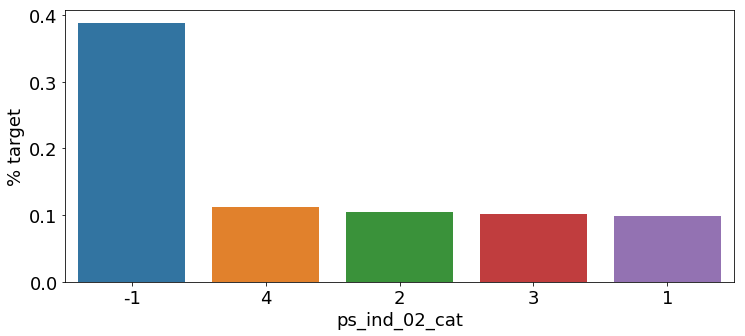

<Figure size 432x288 with 0 Axes>

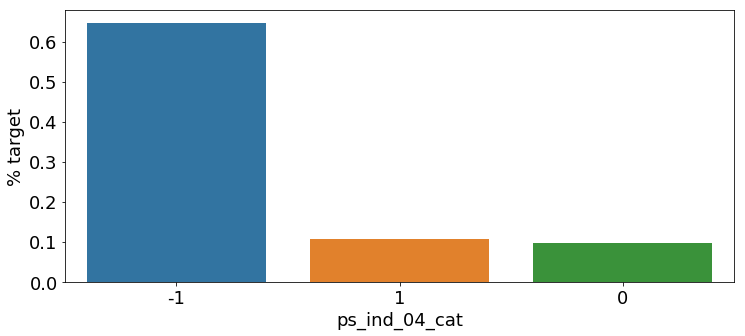

<Figure size 432x288 with 0 Axes>

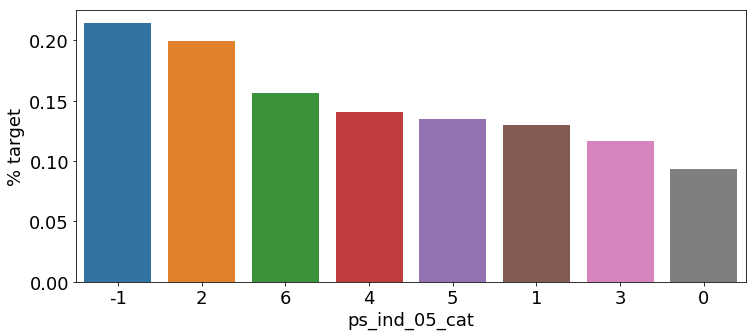

<Figure size 432x288 with 0 Axes>

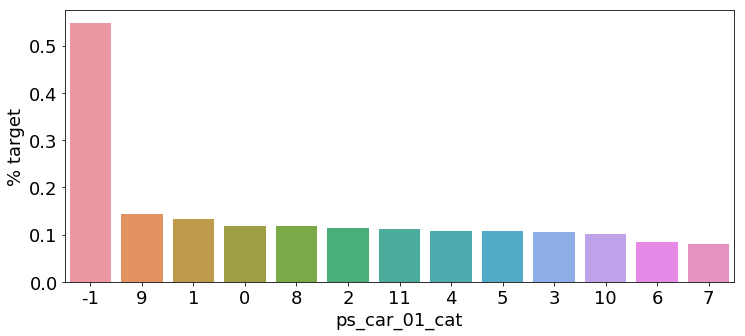

<Figure size 432x288 with 0 Axes>

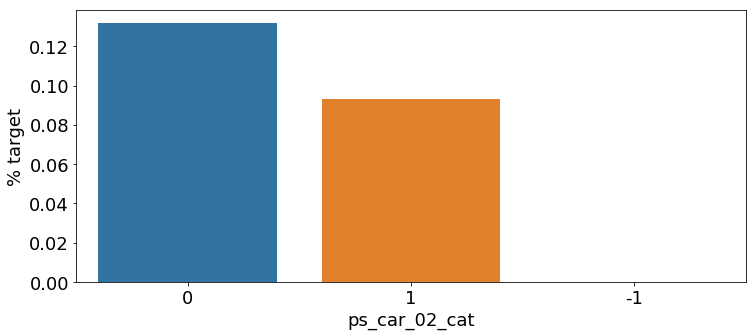

<Figure size 432x288 with 0 Axes>

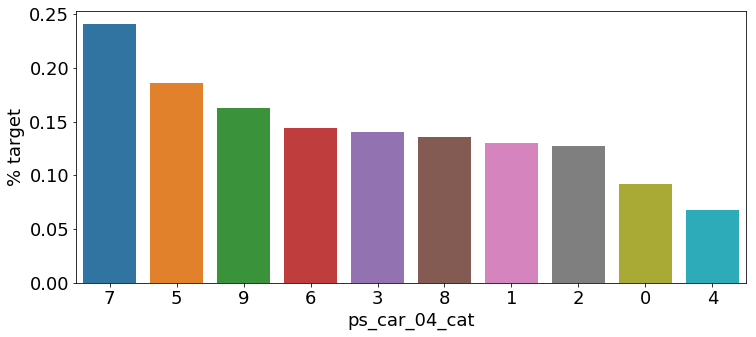

<Figure size 432x288 with 0 Axes>

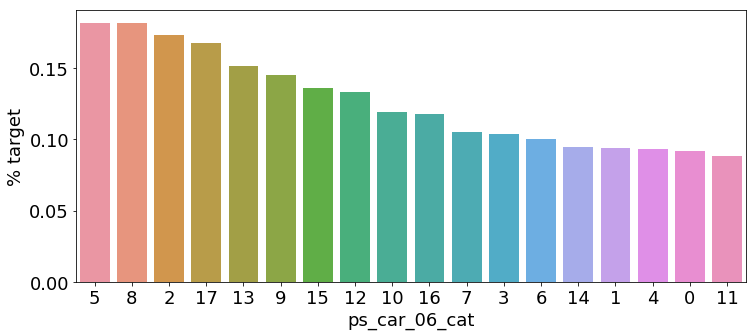

<Figure size 432x288 with 0 Axes>

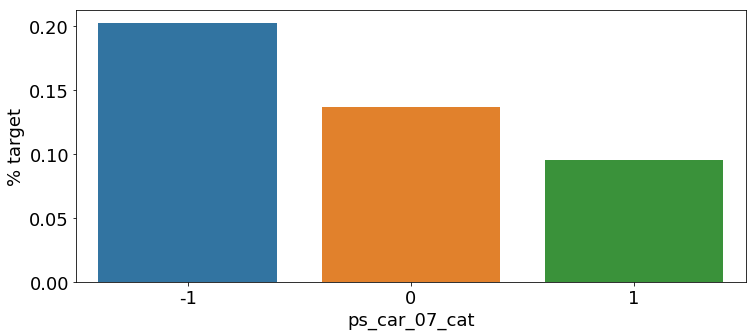

<Figure size 432x288 with 0 Axes>

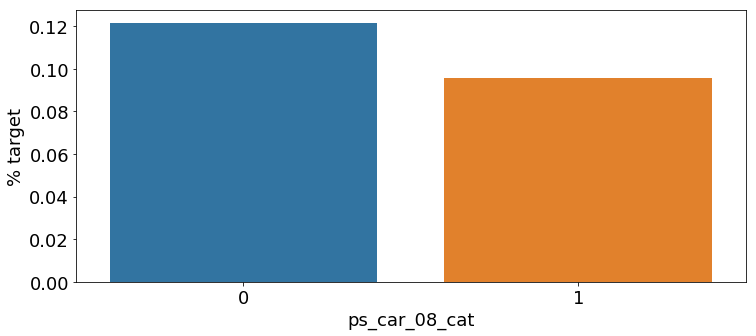

<Figure size 432x288 with 0 Axes>

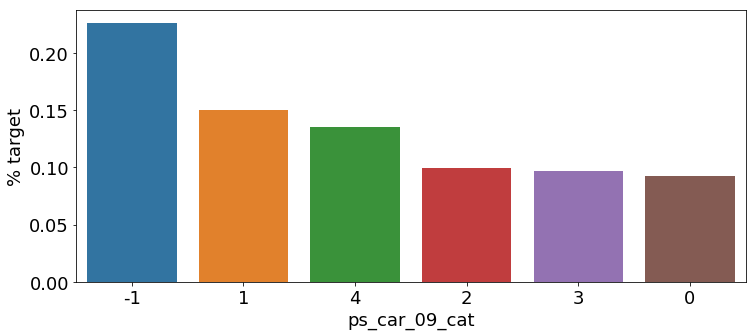

<Figure size 432x288 with 0 Axes>

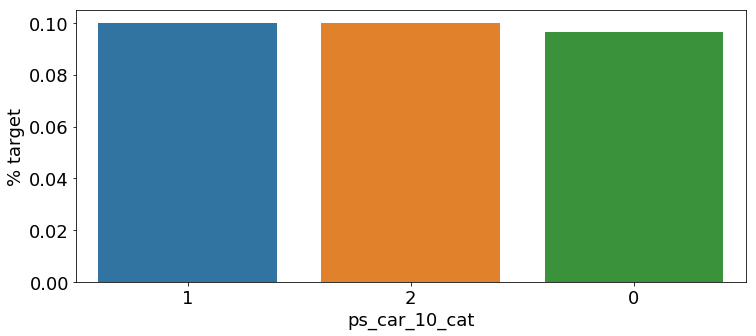

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v :
    plt.figure()
    fig, ax = plt.subplots(figsize = (12,5))
    
    cat_perc = train[[f, 'target']].groupby([f], as_index= False).mean()
    cat_perc.sort_values(by = 'target', ascending = False, inplace = True)
    
    sns.barplot(ax = ax, x = f, y = 'target', data = cat_perc, order = cat_perc[f])
    plt.ylabel('% target', fontsize = 18)
    plt.xlabel(f, fontsize = 18)
    plt.tick_params(axis= 'both', which = 'major', labelsize = 18)
    plt.show()

- 변수별로 차이는 있지만, imputing을 하는대신, -1을 별도의 범주 값으로 유지하는 것은 good idea!
- -1일 경우 1일 확률이 높다

## interval 변수

In [23]:
def corr_heatmap(v) :
    correlations = train[v].corr()
    
    # 두 가지 색상 사이의 색상 맵 만들기
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize = (10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()

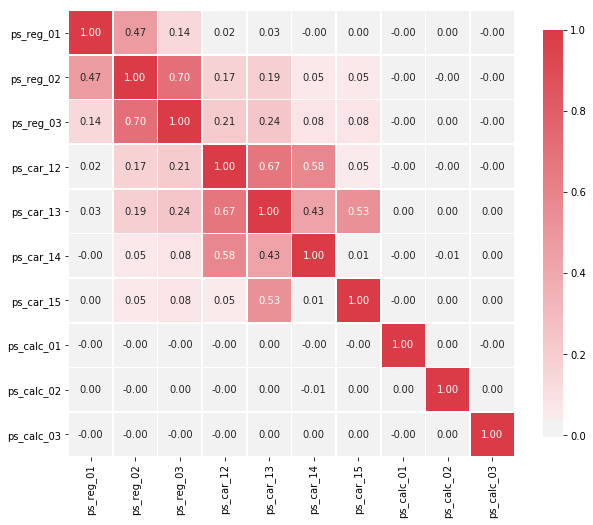

In [24]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

- ps_reg_02 and ps_reg_03 (0.70)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

In [25]:
#train 데이터의 샘플을 사용!
s = train.sample(frac = 0.1)

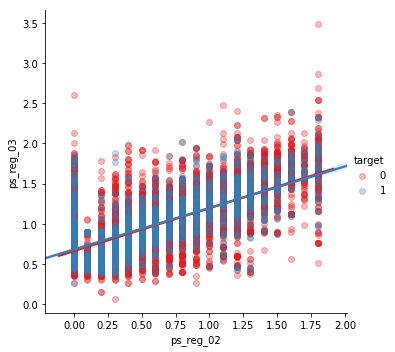

In [26]:
#ps_reg_02 and ps_reg_03
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data = s, palette = 'Set1', hue = 'target', scatter_kws={'alpha' : 0.3})

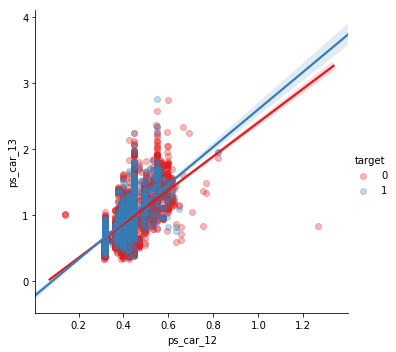

In [27]:
#ps_car_12 and ps_car_13
sns.lmplot(x = 'ps_car_12', y = 'ps_car_13', data = s, palette = 'Set1', hue = 'target', scatter_kws={'alpha' : 0.3})

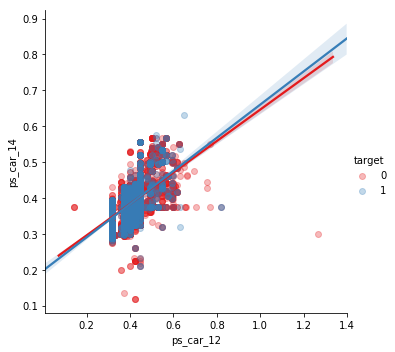

In [28]:
#ps_car_12 and ps_car_14
sns.lmplot(x = 'ps_car_12', y = 'ps_car_14', data = s, palette = 'Set1', hue = 'target', scatter_kws={'alpha' : 0.3})

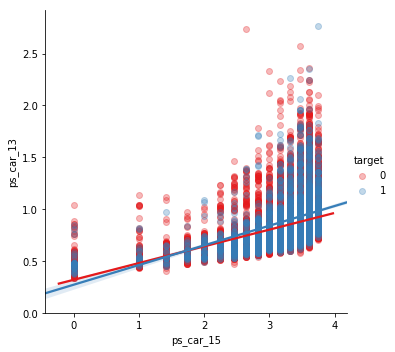

In [29]:
#ps_car_15 and ps_car_13
sns.lmplot(x = 'ps_car_15', y = 'ps_car_13', data = s, palette = 'Set1', hue = 'target', scatter_kws={'alpha' : 0.3})

## ordinal variables

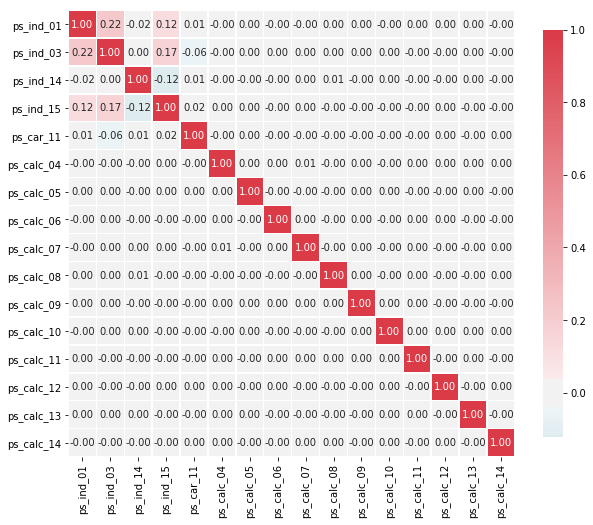

In [30]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

- 큰 상관관계가 보이지 않는다

# Feature Engineering
## Dummy Variables
- nominal

In [31]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before make dummies we have {} variabels in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns = v, drop_first = True) #첫번째 column은 drop
print('After make dummies we have {} variabels in train'.format(train.shape[1]))

Before make dummies we have 57 variabels in train
After make dummies we have 109 variabels in train


## interaction variables
- interval

In [32]:
# PolynomialFeature(degree = 2)
# (x1,x2) -> (1, x1, x2, x1^2, x2^2, x1*x2)
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
#interaction_only : True - 상호작용항만 출력
#include_bias : True - 상수항 포함

interactions = pd.DataFrame(data = poly.fit_transform(train[v]), columns = poly.get_feature_names(v))
interactions.drop(v, axis = 1, inplace = True) #drop original columns

print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis = 1)
print('AFter creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
AFter creating interactions we have 164 variables in train


# Feature Selection
## Variance Threshold
- 분산이 0이거나(모든 값이 동일) 분산이 낮은(대부분의 값이 비슷) feature 제거
- 여기서 threshold = 0.01

In [33]:
selector = VarianceThreshold(threshold = 0.01)
selector.fit(train.drop(['id', 'target'], axis = 1))

VarianceThreshold(threshold=0.01)

In [34]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [35]:
f = np.vectorize(lambda x : not x) #False -> True / True -> False
v = train.drop(['id', 'target'], axis = 1).columns[f(selector.get_support())]

print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


## selecting features with RandomForest

In [36]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1] #큰 순서부터

for f in range(X_train.shape[1]) :
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021154
 2) ps_car_13                      0.017291
 3) ps_car_13^2                    0.017287
 4) ps_car_12 ps_car_13            0.017282
 5) ps_reg_03 ps_car_13            0.017153
 6) ps_car_13 ps_car_14            0.017142
 7) ps_car_13 ps_car_15            0.016834
 8) ps_reg_01 ps_car_13            0.016752
 9) ps_reg_03 ps_car_14            0.016217
10) ps_reg_03 ps_car_12            0.015580
11) ps_reg_03 ps_car_15            0.015133
12) ps_car_14 ps_car_15            0.015065
13) ps_reg_01 ps_reg_03            0.014722
14) ps_car_13 ps_calc_03           0.014699
15) ps_car_13 ps_calc_02           0.014689
16) ps_reg_02 ps_car_13            0.014685
17) ps_car_13 ps_calc_01           0.014679
18) ps_reg_01 ps_car_14            0.014368
19) ps_reg_03^2                    0.014243
20) ps_reg_03                      0.014221
21) ps_reg_03 ps_calc_02           0.013768
22) ps_reg_03 ps_calc_03           0.013754
23) ps_calc_10                  

## selectFromModel

In [38]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [39]:
train = train[selected_vars + ['target']]